In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library, for simple plots
import seaborn as sns # plotting utility

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cs412-fall2020/test.xlsx
/kaggle/input/cs412-fall2020/sampleSubmission.csv
/kaggle/input/cs412-fall2020/train.xlsx
/kaggle/input/cs412-fall2020/dataset_explanation.csv


In [21]:
train_df = pd.read_excel("../input/cs412-fall2020/train.xlsx")
test_df = pd.read_excel("../input/cs412-fall2020/test.xlsx")

## 1.Visualization

### Utility Functions

In [22]:
# Plotting some categorical features
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [23]:
# 20th percentile grouping function
def group_lower_ranking_values_20(column):
    feature_counts = train_df.groupby(column).agg('count')
    pct_value = feature_counts[lambda x: x.columns[0]].quantile(.20)
    values_below_pct_value = feature_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    feature_grouped = train_df.apply(fix_values, axis=1).groupby(column).agg('count')
    return feature_grouped

In [24]:
# 25th percentile grouping function
def group_lower_ranking_values_25(column):
    feature_counts = train_df.groupby(column).agg('count')
    pct_value = feature_counts[lambda x: x.columns[0]].quantile(.25)
    values_below_pct_value = feature_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    feature_grouped = train_df.apply(fix_values, axis=1).groupby(column).agg('count')
    return feature_grouped

In [25]:
# 50th percentile grouping function
def group_lower_ranking_values_50(column):
    feature_counts = train_df.groupby(column).agg('count')
    pct_value = feature_counts[lambda x: x.columns[0]].quantile(.50)
    values_below_pct_value = feature_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    feature_grouped = train_df.apply(fix_values, axis=1).groupby(column).agg('count')
    return feature_grouped

In [26]:
# 60th percentile grouping function
def group_lower_ranking_values_60(column):
    feature_counts = train_df.groupby(column).agg('count')
    pct_value = feature_counts[lambda x: x.columns[0]].quantile(.60)
    values_below_pct_value = feature_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    feature_grouped = train_df.apply(fix_values, axis=1).groupby(column).agg('count')
    return feature_grouped

In [27]:
# 75th percentile grouping function
def group_lower_ranking_values_75(column):
    feature_counts = train_df.groupby(column).agg('count')
    pct_value = feature_counts[lambda x: x.columns[0]].quantile(.75)
    values_below_pct_value = feature_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    feature_grouped = train_df.apply(fix_values, axis=1).groupby(column).agg('count')
    return feature_grouped

### 1.1 GenderSelect

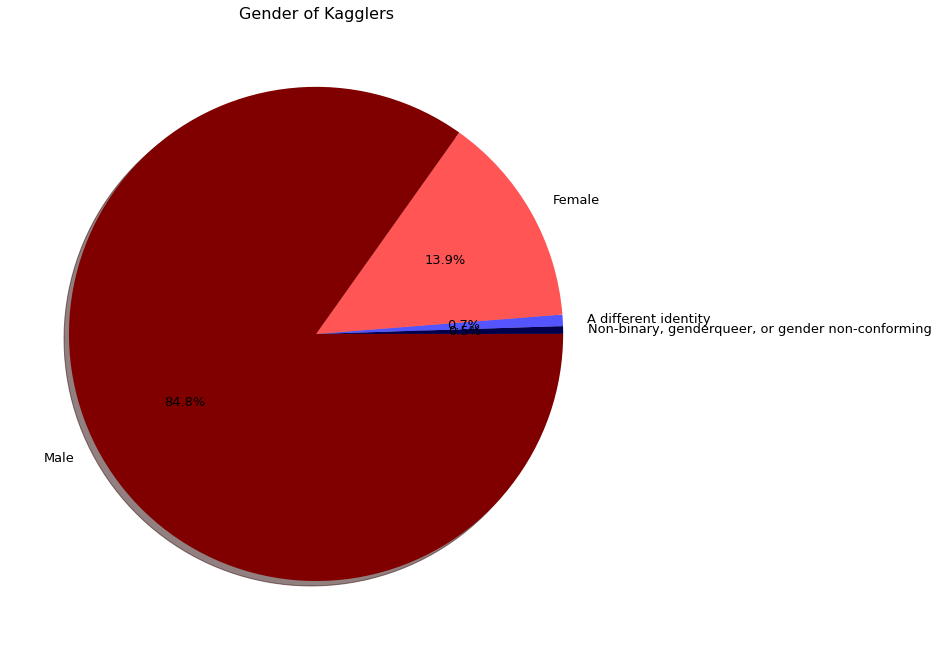

In [28]:
# GenderSelect
title_gender = train_df.groupby('GenderSelect').agg('count')
gender_labels = title_gender["ID"].sort_values().index 
gender_counts = title_gender["ID"].sort_values()

# Figure plot
plt.figure(1, figsize=(25,25)) 
the_grid = GridSpec(2, 2)

# Color Map
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]

# Finalization
plt.subplot(the_grid[0, 0], aspect=1)
type_show_ids = plt.pie(gender_counts, labels=gender_labels, 
                        autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 13})

#plt.legend(loc="upper right", fontsize=13)
plt.title(label="Gender of Kagglers", fontsize=16)
plt.show()

### 1.2 Country

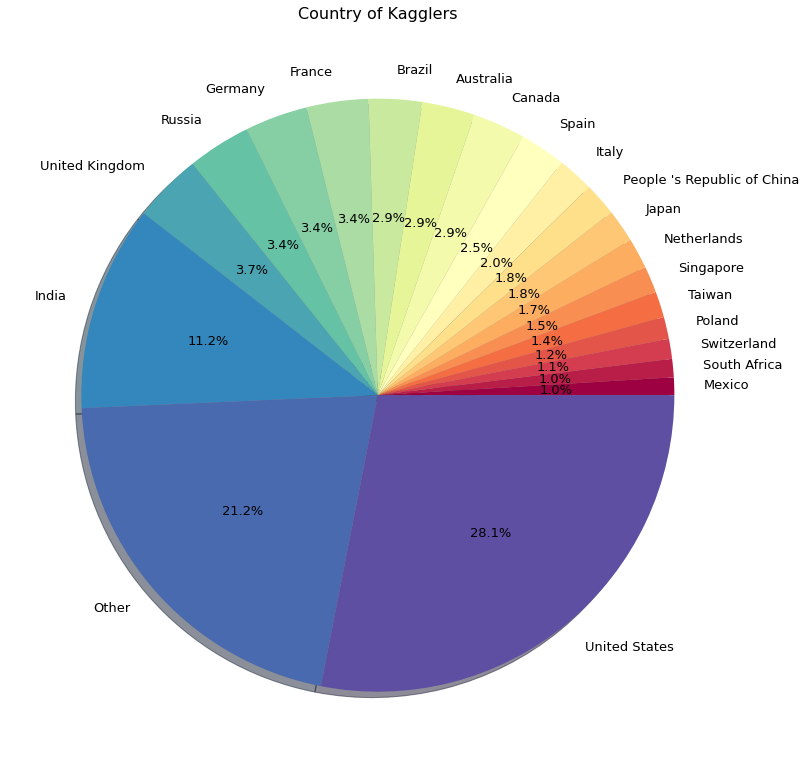

In [29]:
# Country
country_groupped = group_lower_ranking_values_60("Country")
country_labels = country_groupped["ID"].sort_values().index 
country_counts = country_groupped["ID"].sort_values()

# Figure plot
plt.figure(1, figsize=(30,30)) 
the_grid = GridSpec(2, 2)

# Color Map
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 21)]

# Finalization
plt.subplot(the_grid[0, 0], aspect=1)
type_show_ids = plt.pie(country_counts, labels=country_labels, 
                        autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 13})

#plt.legend(loc="upper right", fontsize=13)
plt.title(label="Country of Kagglers", fontsize=16)
plt.show()

### 1.3 FormalEducation

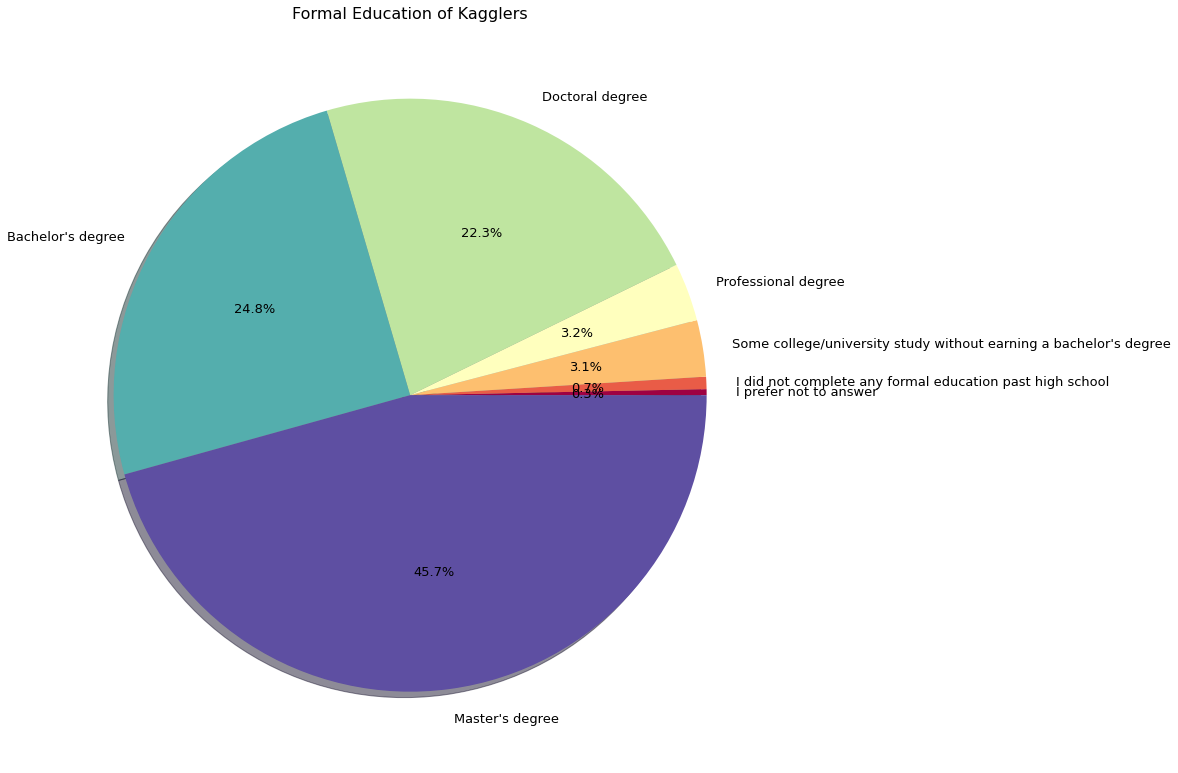

In [30]:
# Formal Education
formaled_groupped = train_df.groupby('FormalEducation').agg('count')
formaled_labels = formaled_groupped["ID"].sort_values().index 
formaled_counts = formaled_groupped["ID"].sort_values()

# Figure plot
plt.figure(1, figsize=(30,30)) 
the_grid = GridSpec(2, 2)

# Color Map
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

# Finalization
plt.subplot(the_grid[0, 0], aspect=1)
type_show_ids = plt.pie(formaled_counts, labels=formaled_labels, 
                        autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 13})

#plt.legend(loc="upper right", fontsize=13)
plt.title(label="Formal Education of Kagglers", fontsize=16)
plt.show()

### 1.4 MajorSelect

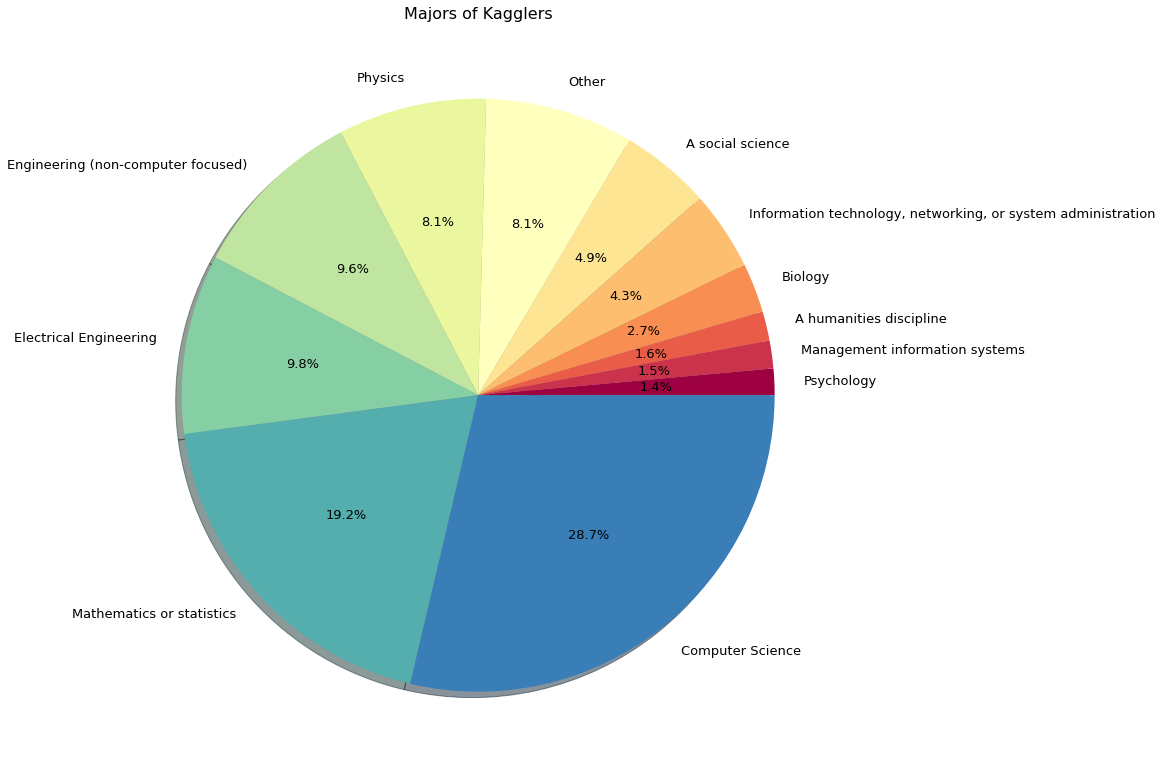

In [31]:
# Major Select
majorselect_groupped = group_lower_ranking_values_20("MajorSelect")
majorselect_labels = majorselect_groupped["ID"].sort_values().index 
majorselect_counts = majorselect_groupped["ID"].sort_values()

# Figure plot
plt.figure(1, figsize=(30,30)) 
the_grid = GridSpec(2, 2)

# Color Map
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 13)]

# Finalization
plt.subplot(the_grid[0, 0], aspect=1)
type_show_ids = plt.pie(majorselect_counts, labels=majorselect_labels, 
                        autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 13})

#plt.legend(loc="upper right", fontsize=13)
plt.title(label="Majors of Kagglers", fontsize=16)
plt.show()

### 1.5 Age vs JobSatisfaction

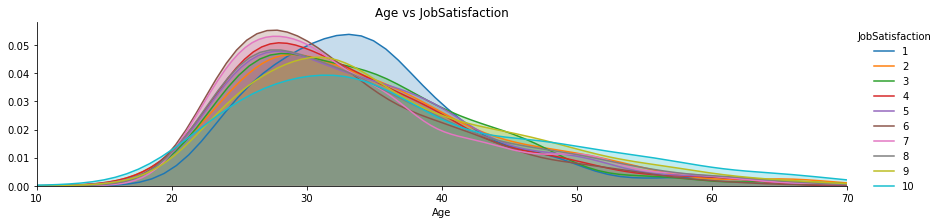

In [32]:
facet = sns.FacetGrid(train_df, hue="JobSatisfaction",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

plt.title("Age vs JobSatisfaction")
plt.xlim(10, 70)
plt.show() 

### 1.6 EmployerIndustry

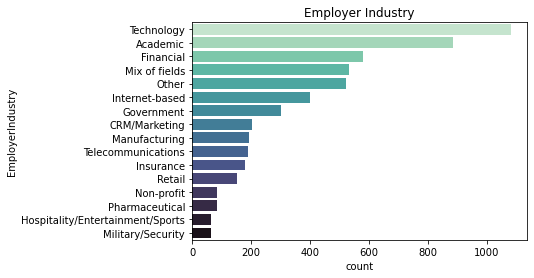

In [33]:
plt.title('Employer Industry')
sns.countplot(y = train_df.EmployerIndustry, palette=("mako_r"),
              order = train_df.EmployerIndustry.value_counts().index)

### 1.7 Gender vs JobSatisfaction

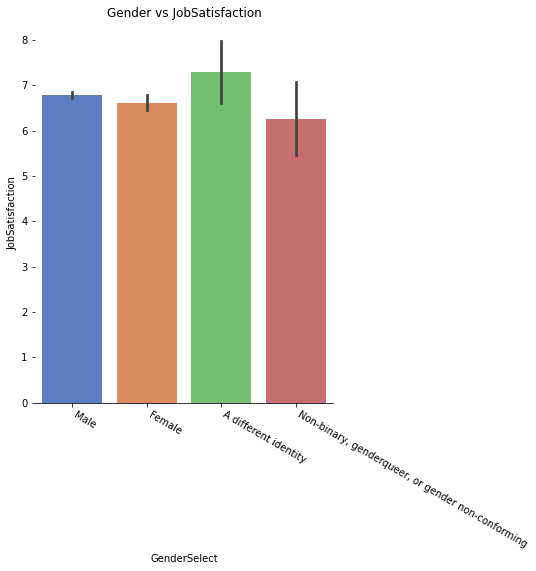

In [34]:
g = sns.catplot(y="JobSatisfaction", x="GenderSelect", data=train_df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("JobSatisfaction")
plt.title("Gender vs JobSatisfaction")
g.set_xticklabels(rotation=350, ha="left")

### 1.8 Formal Education vs JobSatisfaction respect to Gender

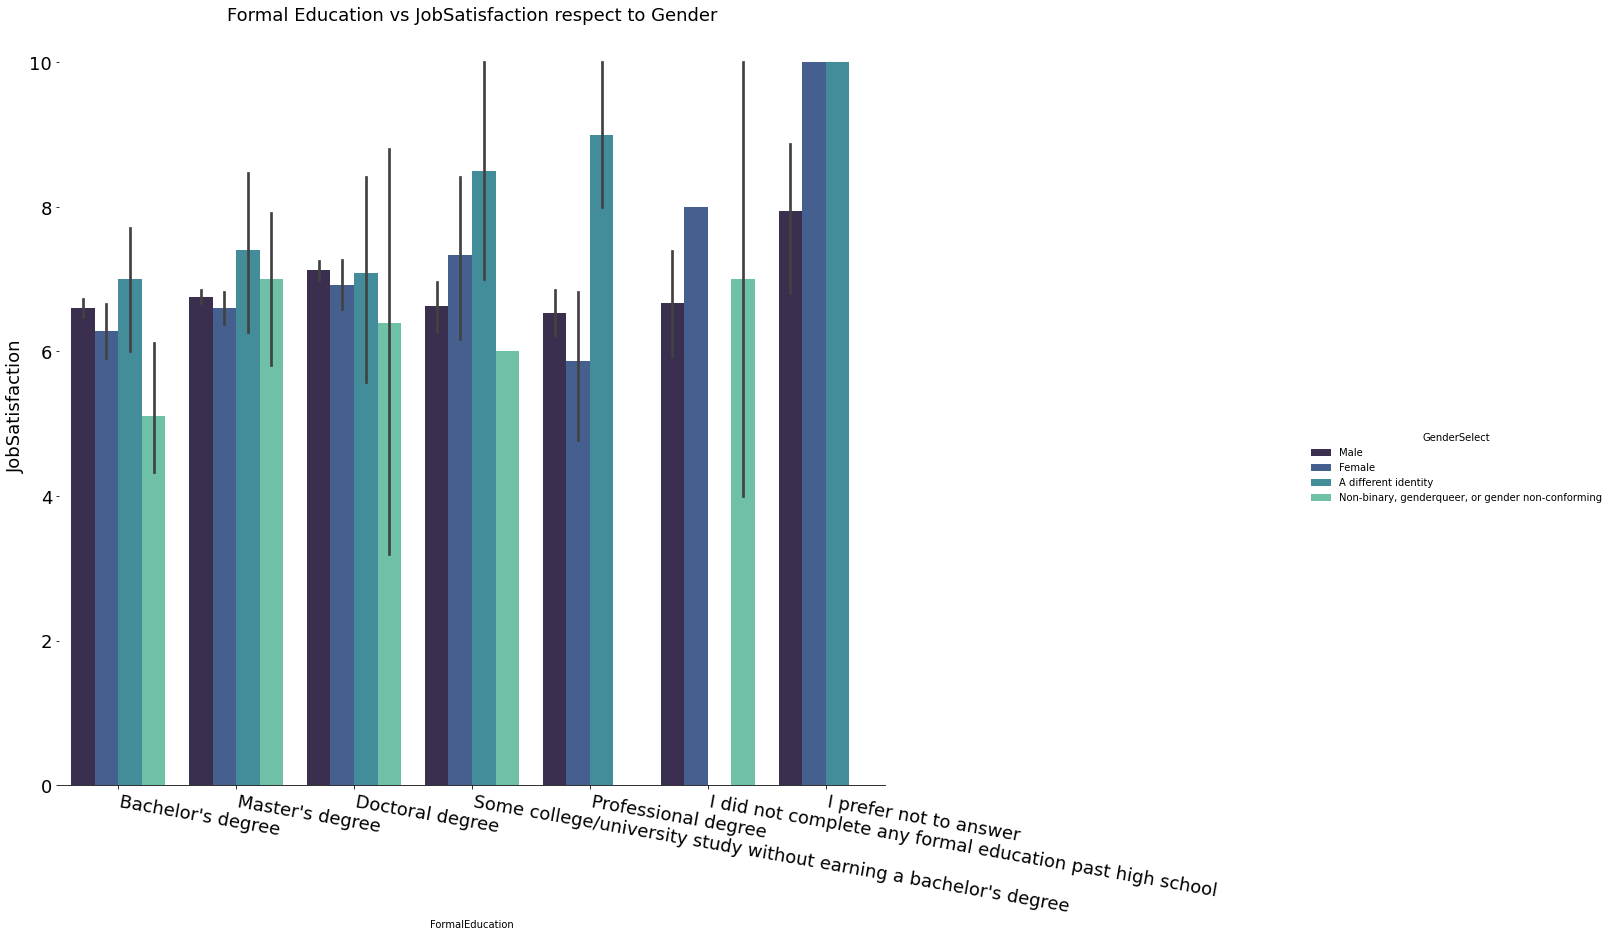

In [42]:
g = sns.catplot(y="JobSatisfaction", x="FormalEducation", hue="GenderSelect", data=train_df,
                height=6, kind="bar", palette="mako")
g.despine(left=True)
g.set_ylabels("JobSatisfaction", fontsize=18)
g.set_yticklabels(fontsize=18)
g.set_xticklabels(rotation=350, ha="left", fontsize=18)

plt.title("Formal Education vs JobSatisfaction respect to Gender", fontsize=18)

fig = plt.gcf()
fig.set_size_inches(24, 12)

### 1.9 Work Methods Frequencies of ML Methods

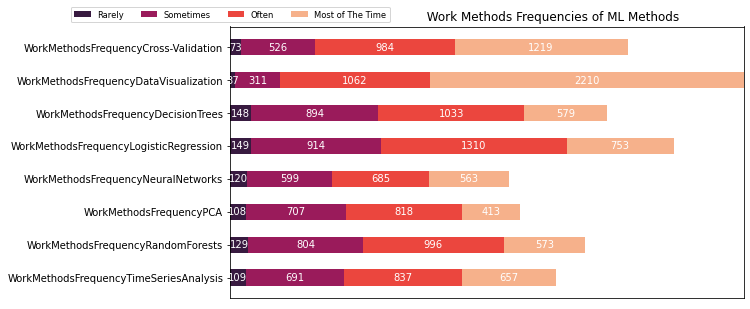

In [36]:
category_names = ['Rarely', 'Sometimes', 'Often', 'Most of The Time']
results = {
    'WorkMethodsFrequencyCross-Validation': [73, 526, 984, 1219],
    'WorkMethodsFrequencyDataVisualization': [37, 311, 1062, 2210],
    'WorkMethodsFrequencyDecisionTrees': [148, 894, 1033, 579],
    'WorkMethodsFrequencyLogisticRegression': [149, 914, 1310, 753],
    'WorkMethodsFrequencyNeuralNetworks': [120, 599, 685, 563],
    'WorkMethodsFrequencyPCA': [108, 707, 818, 413],
    'WorkMethodsFrequencyRandomForests': [129, 804, 996, 573],
    'WorkMethodsFrequencyTimeSeriesAnalysis': [109, 691, 837, 657]}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('rocket')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _= color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower center', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.title("                                  Work Methods Frequencies of ML Methods")
plt.show()

### 2.0 Used Language Frequencies of Kagglers

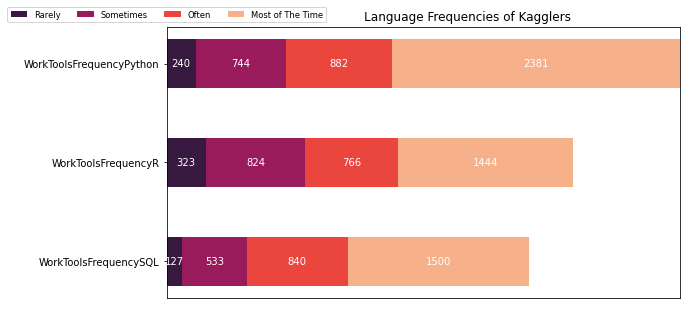

In [37]:
category_names = ['Rarely', 'Sometimes', 'Often', 'Most of The Time']
results = {
    'WorkToolsFrequencyPython': [240, 744, 882, 2381],
    'WorkToolsFrequencyR': [323, 824, 766, 1444],
    'WorkToolsFrequencySQL': [127, 533, 840, 1500]}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('rocket')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower center', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.title("                       Language Frequencies of Kagglers")
plt.show()